In [ ]:
install.packages("sf")
install.packages("knitr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘s2’




In [ ]:
library(tidyverse)
library(sf)
library(knitr)

En primer lugar, leemos el conjunto de datos y vemos su estructura

In [ ]:
df <- read.csv("https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-08-25/visualisations/listings.csv")

head(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NA,Palermo,-34.58184,-58.42415,Entire home/apt,60390,3,42,2024-07-28,0.28,1,276,6,
2,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NA,Palermo,-34.58617,-58.41036,Entire home/apt,37001,7,120,2024-07-07,0.81,7,37,10,
3,15074,ROOM WITH RIVER SIGHT,59338,Monica,NA,Nuñez,-34.53892,-58.46599,Private room,NA,29,0,,NA,1,0,0,
4,96490,AMPLIA habitación individual en Buenos Aires,512049,Cristina,NA,Palermo,-34.58503,-58.41206,Private room,8000,7,1,2023-01-15,0.05,2,352,0,
5,16695,DUPLEX LOFT 2 - SAN TELMO,64880,Elbio Mariano,NA,Monserrat,-34.61439,-58.37611,Entire home/apt,47275,2,45,2019-11-30,0.27,9,238,0,
6,96810,Recoleta Luxury: Design and Style!,508291,Michele,NA,Retiro,-34.59357,-58.38703,Entire home/apt,78928,5,44,2023-11-18,0.35,1,365,3,


In [ ]:
summary(df)

       id                name              host_id           host_name        
 Min.   :1.151e+04   Length:36807       Min.   :    13426   Length:36807      
 1st Qu.:4.602e+07   Class :character   1st Qu.: 30423321   Class :character  
 Median :8.544e+17   Mode  :character   Median :141718868   Mode  :character  
 Mean   :6.700e+17                      Mean   :209853879                     
 3rd Qu.:1.048e+18                      3rd Qu.:416386950                     
 Max.   :1.231e+18                      Max.   :598066196                     
                                                                              
 neighbourhood_group neighbourhood         latitude        longitude     
 Mode:logical        Length:36807       Min.   :-34.69   Min.   :-58.53  
 NA's:36807          Class :character   1st Qu.:-34.60   1st Qu.:-58.44  
                     Mode  :character   Median :-34.59   Median :-58.42  
                                        Mean   :-34.59   Mean   :-58.42 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2956 rows containing non-finite outside the scale range (`stat_bin()`).”


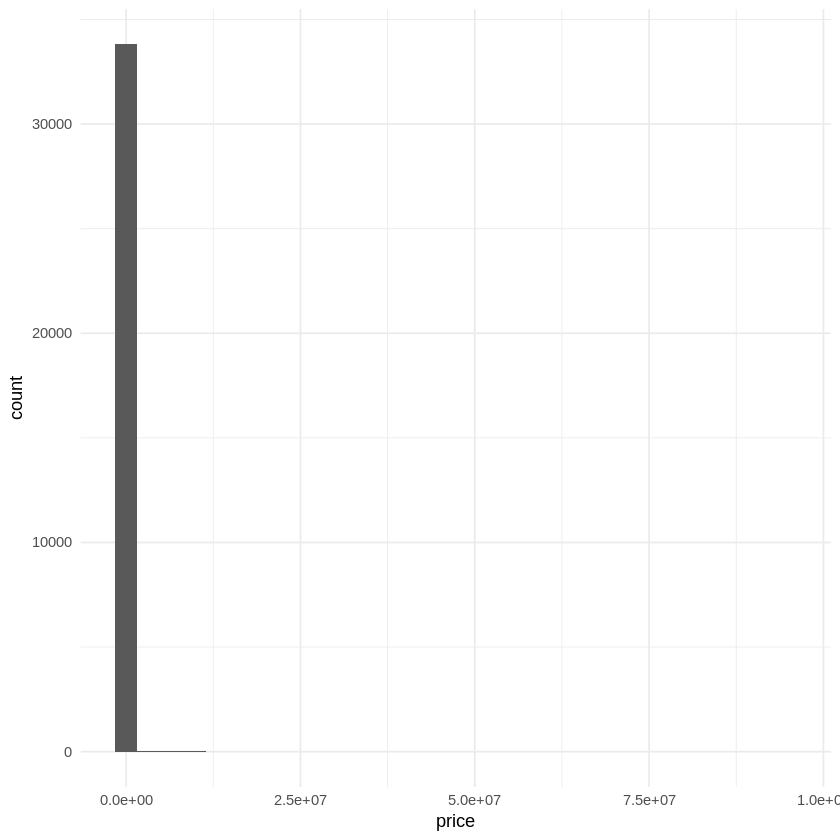

In [ ]:
ggplot(df,aes(price))+
  geom_histogram()+
  theme_minimal()

In [ ]:
percentiles <- quantile(df$price, probs = c(0.01,0.99), na.rm = T)

percentiles

1%    99% 
 10360 258666

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


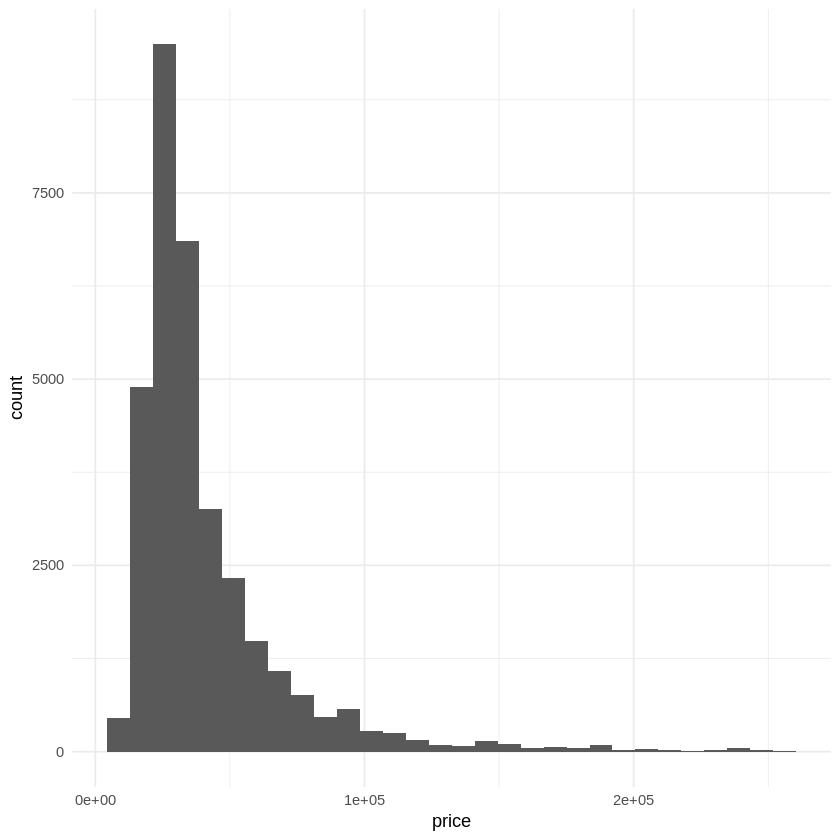

In [ ]:
df <- df %>%
  filter(price > percentiles[1] & price < percentiles[2])


ggplot(df,aes(price))+
  geom_histogram()+
  theme_minimal()

In [ ]:
df <- st_as_sf(df, coords = c("longitude", "latitude"), crs = 4326)

In [ ]:
poi = data.frame(
  nombre = c("Obelisco","Casa rosada","Teatro colon", "Caminito", "Bellas artes", "El planetario", "Cementerio recoleta", "Palacio barolo", "Estadio monumental", "La bombonera"),
  longitude = c(-58.381629, -58.370275, -58.383182, -58.361985, -58.392913, -58.411713, -58.393546, -58.3857362, -58.44969, -58.36478),
  latitude = c(-34.603725, -34.608076, -34.601130, -34.639407, -34.583932, -34.569655, -34.587644, -34.6095791, -34.54531, -34.63575)
)

poi


nombre,longitude,latitude
<chr>,<dbl>,<dbl>
Obelisco,-58.38163,-34.60372
Casa rosada,-58.37027,-34.60808
Teatro colon,-58.38318,-34.60113
Caminito,-58.36198,-34.63941
Bellas artes,-58.39291,-34.58393
El planetario,-58.41171,-34.56965
Cementerio recoleta,-58.39355,-34.58764
Palacio barolo,-58.38574,-34.60958
Estadio monumental,-58.44969,-34.54531


In [ ]:
poi <- st_as_sf(poi, coords = c("longitude", "latitude"), crs = 4326)

In [ ]:
df <- st_transform(df, crs = 3857)
poi <- st_transform(poi, crs = 3857)

In [ ]:
distancias <- st_distance(df, poi)

# Convertir a una unidad más manejable (metros)
#distancias <- set_units(distancias, "m")
#distancias

In [ ]:
head(distancias)

Units: [m]
          [,1]     [,2]     [,3]      [,4]     [,5]     [,6]     [,7]      [,8]
[1,] 5582.4242 6968.186 5253.823 10417.034 3488.773 2151.907 3496.042 5688.3541
[2,] 3983.0830 5356.078 3639.486  8991.686 1965.624 2237.939 1882.308 4187.5393
[3,] 1567.8588 1072.962 1958.607  3731.787 4523.859 7232.002 4104.991 1253.6814
[4,] 1499.1657 2706.920 1108.480  6798.142 1458.541 4243.278 1080.868 2169.8682
[5,] 7302.5649 8696.559 7006.823 11796.875 5427.688 3713.509 5407.000 7262.4276
[6,]  868.3599 1966.836 1011.877  5192.309 3236.374 5762.882 2758.344  371.4242
          [,9]     [,10]
[1,]  5698.063  9840.978
[2,]  7048.281  8409.237
[3,] 12422.805  3152.826
[4,]  9550.899  6219.800
[5,]  5020.500 11237.813
[6,] 10862.108  4608.091

In [ ]:
distancias_df = as.data.frame(distancias)

In [ ]:
set.seed(12345);km=kmeans(distancias_df, 6)
names(km)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [ ]:
km$cluster

[1] 3 3 5 1 2 1 1 1 2 3 1 3 3 2 4 2 2 3 5 2 1 2 5 3 4 5 3 2 3 1 3 2 1 1 1 5
   [37] 5 4 3 3 3 1 2 1 3 3 1 2 2 3 5 1 3 5 1 2 5 3 2 1 5 1 2 2 3 3 2 2 1 1 3 2
   [73] 3 3 1 2 1 5 5 5 3 5 5 3 1 2 5 3 2 1 5 1 3 1 5 4 2 2 2 3 5 1 3 3 3 3 3 2
  [109] 1 5 3 5 3 2 1 2 2 3 3 3 1 1 2 3 3 3 5 2 2 1 3 1 2 3 4 3 2 2 2 3 1 1 3 2
  [145] 1 1 1 3 2 2 3 3 3 5 3 3 3 3 1 5 3 5 3 5 3 3 3 3 3 3 3 5 4 5 5 3 1 3 3 3
  [181] 1 4 1 3 5 2 3 3 5 3 3 1 1 2 4 5 3 5 2 3 3 2 1 3 3 3 2 1 3 2 3 1 3 2 1 1
  [217] 2 2 2 3 1 1 1 3 3 2 5 3 1 2 2 2 2 1 2 3 5 5 2 3 3 3 1 5 3 2 2 3 3 3 3 2
  [253] 3 1 2 5 5 2 5 2 4 3 1 2 3 1 1 1 3 1 2 3 1 5 5 3 1 3 2 2 5 2 5 3 3 3 3 1
  [289] 2 1 2 2 2 2 2 4 5 3 2 3 2 5 5 1 3 3 3 1 2 1 3 2 1 3 3 5 3 3 1 5 2 3 5 3
  [325] 5 2 2 1 1 1 1 5 1 4 3 1 5 5 3 5 3 5 3 2 5 4 2 2 5 2 5 3 3 3 1 1 2 3 2 2
  [361] 2 1 3 2 5 3 3 1 3 3 2 3 2 3 3 5 3 1 2 5 3 3 2 3 3 3 3 2 3 3 3 3 5 3 5 2
  [397] 3 4 2 3 1 5 3 1 4 1 5 5 5 2 1 3 5 2 2 5 5 1 3 1 3 5 2 5 5 2 3 3 1 5 2 4
  [433] 3 1 3 5 4 3 2 5 3 2 2 1 3 2 3 3 2 5 3 3 1 2 2 3 1 1 3 2 1 1 3 2 2 2 1 3
  [469] 3 2 1 4 5 3 3 5 3 1 3 2 3 2 2 1 2 2 2 2 2 2 3 2 1 3 3 2 3 3 1 3 1 2 2 5
  [505] 5 2 1 5 1 5 1 3 3 2 1 3 2 4 3 2 2 3 3 2 3 1 2 1 2 3 4 3 1 2 3 2 1 3 3 1
  [541] 2 3 2 3 3 3 3 2 2 1 3 5 1 2 5 3 2 3 1 5 3 2 3 2 1 3 3 5 2 1 3 5 2 4 1 3
  [577] 3 3 1 3 1 2 2 2 1 1 1 1 5 5 1 3 3 3 3 2 2 2 2 3 4 5 4 2 3 3 4 2 4 3 1 1
  [613] 1 3 1 1 3 4 1 2 3 2 1 2 5 1 2 3 2 1 5 3 3 5 2 2 1 2 2 5 3 4 1 3 3 1 2 3
  [649] 3 2 1 4 3 1 4 1 2 1 1 1 3 1 3 3 5 2 5 3 2 3 2 3 5 3 3 1 2 3 3 2 3 3 3 3
  [685] 2 5 2 1 2 3 1 3 3 1 1 1 1 5 5 5 3 5 1 4 1 2 3 5 3 2 3 5 1 5 1 1 3 2 5 3
  [721] 5 1 5 2 2 5 3 3 3 3 1 3 3 1 1 3 1 3 1 2 4 3 2 2 3 2 3 2 4 5 1 2 3 5 3 3
  [757] 2 1 2 1 3 3 3 5 2 1 2 2 1 3 2 3 2 1 1 4 1 2 3 3 3 3 3 5 5 2 3 3 3 2 5 2
  [793] 5 3 2 2 2 2 1 3 4 1 3 2 1 2 2 1 2 1 2 3 3 3 2 1 3 2 3 5 3 3 4 1 3 2 5 3
  [829] 4 5 2 3 1 3 5 3 3 1 3 2 2 2 4 1 3 3 5 3 3 1 1 2 2 5 3 3 2 3 3 5 5 4 2 4
  [865] 1 2 3 3 3 2 5 1 1 2 3 1 1 2 5 2 2 3 3 2 1 3 3 5 2 1 4 5 4 5 1 4 3 3 1 2
  [901] 2 5 1 3 5 3 3 5 4 3 2 2 3 3 3 1 3 2 1 5 3 3 3 5 2 5 2 2 1 3 2 2 3 5 2 5
  [937] 2 2 1 3 5 1 5 2 2 3 1 5 1 2 3 1 5 2 5 2 3 2 5 3 1 2 3 3 5 3 3 1 3 1 3 3
  [973] 3 3 5 4 2 3 3 2 2 3 1 1 2 1 3 1 1 3 2 1 3 4 4 2 3 2 1 1 3 2 2 1 2 1 3 1
 [1009] 1 1 2 1 5 2 2 1 3 2 1 1 3 5 3 1 4 3 2 2 2 1 4 2 2 1 3 1 5 4 1 3 2 1 2 2
 [1045] 2 5 2 3 2 5 1 3 4 2 2 1 1 3 5 1 5 5 5 5 3 2 3 1 3 2 3 2 2 5 1 3 2 3 5 2
 [1081] 1 3 5 1 1 2 3 2 3 2 1 3 1 2 2 2 2 2 1 1 2 1 2 4 2 3 5 1 3 1 5 4 1 5 3 1
 [1117] 2 3 1 2 1 5 3 1 2 5 3 1 2 1 2 5 5 4 2 3 4 1 5 5 3 3 3 5 1 3 2 3 2 2 2 4
 [1153] 3 2 3 2 5 3 3 3 3 3 5 5 2 5 2 2 1 3 1 3 1 1 3 3 1 3 5 3 2 3 1 2 5 2 1 1
 [1189] 1 4 3 1 4 3 2 3 3 2 1 3 4 3 3 2 3 2 3 1 3 2 2 3 3 1 2 2 1 2 3 1 3 3 2 3
 [1225] 3 3 5 1 1 3 5 5 5 5 3 4 1 3 3 3 1 5 3 1 3 3 3 3 2 1 5 3 3 5 1 5 5 4 4 1
 [1261] 3 5 2 1 3 4 3 4 3 3 2 4 2 2 1 4 1 2 5 1 2 3 3 3 3 3 3 2 3 1 4 2 2 2 5 1
 [1297] 3 3 5 1 4 2 5 3 1 3 2 1 3 3 2 3 3 2 1 3 2 2 2 2 4 3 2 1 3 4 2 5 1 3 1 1
 [1333] 2 2 3 4 2 3 2 3 1 3 3 3 1 1 5 5 3 3 4 3 5 1 1 1 3 1 3 2 3 2 3 3 3 3 1 2
 [1369] 3 1 1 1 1 3 1 3 2 3 3 3 5 3 5 1 1 3 2 1 2 3 2 3 4 5 1 5 1 5 5 2 2 1 2 2
 [1405] 3 3 1 1 3 3 3 1 1 2 1 3 3 3 3 5 1 1 2 4 3 3 5 2 2 2 1 5 5 5 2 2 1 3 4 1
 [1441] 2 2 2 1 3 1 2 1 4 3 3 1 3 2 3 1 3 3 2 3 2 1 3 4 2 1 3 4 5 5 5 2 1 2 2 1
 [1477] 1 1 3 3 1 3 2 3 2 2 1 1 4 3 3 1 5 5 2 2 2 1 2 2 2 1 2 1 2 5 3 1 4 1 4 3
 [1513] 4 3 3 1 1 1 5 4 4 2 5 3 3 2 2 3 1 3 4 3 4 1 2 3 2 3 1 2 3 3 3 3 2 3 1 3
 [1549] 2 1 1 2 3 4 2 3 2 4 1 3 3 3 3 1 2 3 3 5 3 3 2 3 3 2 4 5 4 3 1 1 5 2 5 2
 [1585] 1 2 3 3 2 3 1 5 2 5 1 5 2 4 3 1 2 2 3 3 2 1 4 3 1 3 1 2 5 3 3 4 4 3 1 3
 [1621] 5 1 5 4 5 2 2 5 3 2 3 2 4 2 4 1 1 3 2 4 1 4 3 2 2 3 4 5 4 2 3 2 2 4 1 2
 [1657] 1 1 5 3 1 3 5 2 5 4 3 2 1 2 4 1 1 2 1 1 1 1 2 3 5 2 1 3 1 3 2 3 3 2 2 3
 [1693] 3 2 2 3 3 5 3 5 2 1 5 3 3 1 5 1 4 1 2 5 2 2 5 3 3 4 2 1 3 2 1 2 4 1 1 3
 [1729] 2 5 2 5 1 4 2 1 3 2 3 2 1 1 3 2 4 5 5 1 1 2 2 2 3 3 3 3 1 5 3 3 4 3 1 3
 [1765] 2 3 2 1 2 2 1 5 2 3 5 1 2 5 2 4 3 4 1 2 4 3 1 1 5 2 5 3 2 2 2 1 1 4 1 5
 [18

In [ ]:
km$centers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
1,1084.047,1994.168,1039.776,5725.488,2773.694,5405.191,2378.820,1411.271,10597.977,5153.211
2,5246.017,6594.203,4970.430,9698.547,3701.109,3105.430,3592.597,5206.381,6757.146,9138.733
3,2980.504,4295.505,2663.217,7889.782,1776.775,3379.116,1476.518,3197.933,8307.111,7312.643
4,11353.724,12692.223,11058.273,15660.232,9309.481,7026.314,9387.573,11336.076,4147.061,15125.017
5,2562.725,2081.512,2902.534,3508.778,5289.048,7848.425,4864.023,2146.257,12889.906,2979.865
6,7375.515,8732.258,7088.659,11772.319,5548.600,3848.514,5537.541,7336.866,5189.591,11221.130


In [ ]:
df$cluster = km$cluster
df$distancia_suma = distancias_df$suma
df <- st_transform(df, crs = 4326)

In [ ]:
df_ampliado <- read_csv("https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-08-25/data/listings.csv.gz")

#Extraigo la columna de reseña
df_ampliado = df_ampliado %>%
  select(id,starts_with("review_score"))

Rows: 36807 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (25): listing_url, source, name, description, neighborhood_overview, pi...
dbl  (38): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl   (7): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (5): last_scraped, host_since, calendar_last_scraped, first_review, la...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
df = left_join(df,df_ampliado)

Joining with `by = join_by(id)`


Warning message:
“Removed 7828 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


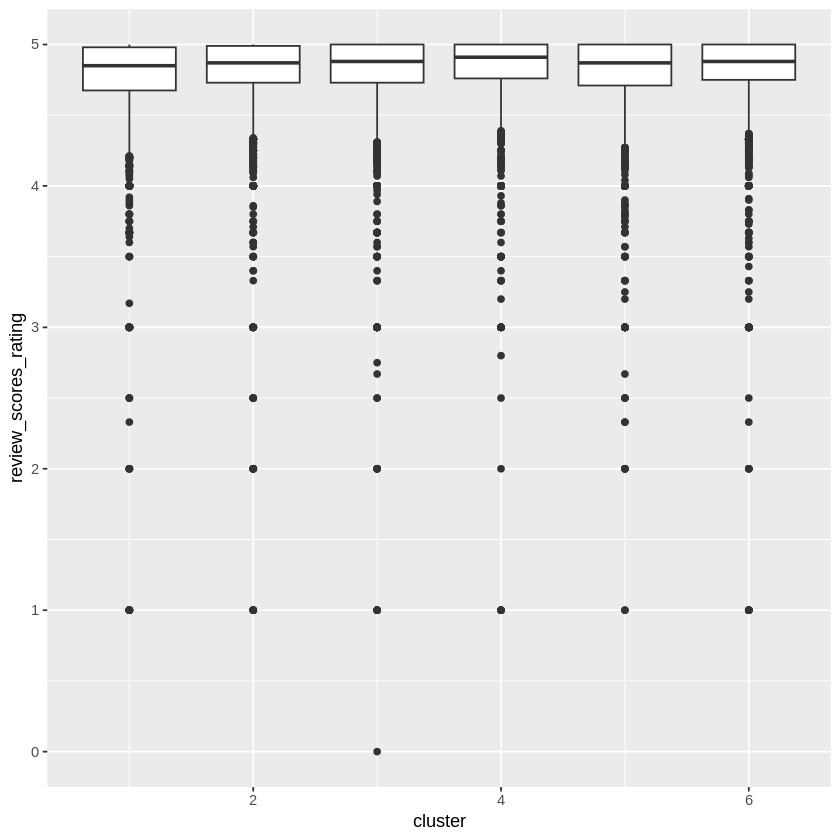

In [ ]:
ggplot(df, aes(x=cluster, y=review_scores_rating, group = cluster)) +
    geom_boxplot()

In [ ]:
df %>%
  group_by(cluster) %>%
  summarise(mean_rating = mean(review_scores_location, na.rm = TRUE))

#ggplot(df_summary, aes(x = cluster, y = mean_rating)) +
#  geom_col() +
#  theme_minimal()

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

cluster,mean_rating,geometry
<int>,<dbl>,<MULTIPOINT [°]>
1,4.862229,MULTIPOINT ((-58.37063 -34....
2,4.906074,MULTIPOINT ((-58.4057 -34.5...
3,4.906155,MULTIPOINT ((-58.3704 -34.5...
4,4.857658,MULTIPOINT ((-58.46243 -34....
5,4.799982,MULTIPOINT ((-58.36927 -34....
6,4.869544,MULTIPOINT ((-58.43777 -34....


In [ ]:
write_csv(df, "base_airbnb_cluster.csv")

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,cluster
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<POINT [m]>,<int>
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NA,Palermo,Entire home/apt,60390,3,42,2024-07-28,0.28,1,276,6,,POINT (-6503747 -4107199),2
2,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NA,Palermo,Entire home/apt,37001,7,120,2024-07-07,0.81,7,37,10,,POINT (-6502212 -4107785),2
3,15074,ROOM WITH RIVER SIGHT,59338,Monica,NA,Nuñez,Private room,NA,29,0,,NA,1,0,0,,POINT (-6508404 -4101397),4
4,96490,AMPLIA habitación individual en Buenos Aires,512049,Cristina,NA,Palermo,Private room,8000,7,1,2023-01-15,0.05,2,352,0,,POINT (-6502401 -4107630),2
5,16695,DUPLEX LOFT 2 - SAN TELMO,64880,Elbio Mariano,NA,Monserrat,Entire home/apt,47275,2,45,2019-11-30,0.27,9,238,0,,POINT (-6498399 -4111601),1
6,96810,Recoleta Luxury: Design and Style!,508291,Michele,NA,Retiro,Entire home/apt,78928,5,44,2023-11-18,0.35,1,365,3,,POINT (-6499614 -4108785),3


In [ ]:
if (!requireNamespace("leaflet")) install.packages("leaflet")

library(leaflet)

Loading required namespace: leaflet

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘terra’, ‘crosstalk’, ‘leaflet.providers’, ‘png’, ‘raster’, ‘sp’




In [ ]:
df <- st_transform(df, crs = 4326)


In [ ]:
pal <- colorFactor(palette = "Set1", domain = df$cluster)



# Crear el mapa
leaflet(df) %>%
  addTiles() %>%
  addCircleMarkers(
    color = ~pal(cluster),
    radius = 6,
    label = ~cluster,
    fillOpacity = 0.8
  ) %>%
  addLegend(
    "bottomright",
    pal = pal,
    values = ~cluster,
    title = "Clúster"
  )

HTML widgets cannot be represented in plain text (need html)

In [ ]:
st_write(df, "mapa_airbnb.geojson", driver = "GeoJSON", delete_dsn = TRUE)

Deleting source `mapa_airbnb.geojson' failed
Writing layer `mapa_airbnb' to data source 
  `mapa_airbnb.geojson' using driver `GeoJSON'
Writing 36807 features with 17 fields and geometry type Point.
